Dataset link: https://www.kaggle.com/datasets/christianlillelund/csgo-round-winner-classification

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Data Preprocessing**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
dataset = pd.read_csv('drive/MyDrive/CSE422 ML project/csgo_round_snapshots.csv')

In [6]:
dataset.head(5)

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT


In [7]:
dataset.shape

(122410, 97)

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122410 entries, 0 to 122409
Data columns (total 97 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   time_left                     122410 non-null  float64
 1   ct_score                      122410 non-null  float64
 2   t_score                       122410 non-null  float64
 3   map                           122410 non-null  object 
 4   bomb_planted                  122410 non-null  bool   
 5   ct_health                     122410 non-null  float64
 6   t_health                      122410 non-null  float64
 7   ct_armor                      122410 non-null  float64
 8   t_armor                       122410 non-null  float64
 9   ct_money                      122410 non-null  float64
 10  t_money                       122410 non-null  float64
 11  ct_helmets                    122410 non-null  float64
 12  t_helmets                     122410 non-nul

In [9]:
dataset.describe()

,time_left,ct_score,t_score,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,...,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade
count,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,...,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000
mean,97.886922,6.709239,6.780435,412.106568,402.714500,314.142121,298.444670,9789.023773,11241.036680,2.053901,...,1.853157,1.858100,1.540814,1.627146,1.001969,0.019819,0.048011,1.352095,0.027694,0.025750
std,54.465238,4.790362,4.823543,132.293290,139.919033,171.029736,174.576545,11215.042286,12162.806759,1.841470,...,1.772791,1.794473,1.737804,1.829147,1.458084,0.143933,0.227669,1.663246,0.169531,0.164162
min,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,54.920000,3.000000,3.000000,350.000000,322.000000,194.000000,174.000000,1300.000000,1550.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,94.910000,6.000000,6.000000,500.000000,500.000000,377.000000,334.000000,5500.000000,7150.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,166.917500,10.000000,10.000000,500.000000,500.000000,486.000000,468.000000,14600.000000,18000.000000,4.000000,...,3.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000
max,175.000000,32.000000,33.000000,500.000000,600.000000,500.000000,500.000000,80000.000000,80000.000000,5.000000,...,7.000000,7.000000,6.000000,9.000000,5.000000,3.000000,3.000000,5.000000,3.000000,2.000000


In [10]:
# checking for null values
dataset.isnull().sum()

time_left                    0
ct_score                     0
t_score                      0
map                          0
bomb_planted                 0
                            ..
ct_grenade_molotovgrenade    0
t_grenade_molotovgrenade     0
ct_grenade_decoygrenade      0
t_grenade_decoygrenade       0
round_winner                 0
Length: 97, dtype: int64

In [11]:
from sklearn.preprocessing import LabelEncoder

# encoding non-numerical values to numerical values 

categorical_features = ["map", "bomb_planted", "round_winner"]

for i in categorical_features:
    le = LabelEncoder()
    dataset[i] = le.fit_transform(dataset[i].values)

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122410 entries, 0 to 122409
Data columns (total 97 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   time_left                     122410 non-null  float64
 1   ct_score                      122410 non-null  float64
 2   t_score                       122410 non-null  float64
 3   map                           122410 non-null  int64  
 4   bomb_planted                  122410 non-null  int64  
 5   ct_health                     122410 non-null  float64
 6   t_health                      122410 non-null  float64
 7   ct_armor                      122410 non-null  float64
 8   t_armor                       122410 non-null  float64
 9   ct_money                      122410 non-null  float64
 10  t_money                       122410 non-null  float64
 11  ct_helmets                    122410 non-null  float64
 12  t_helmets                     122410 non-nul

In [13]:
# differentiating X (set/columns of features) and y (result)
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1] # list[-1]

In [14]:
from sklearn.preprocessing import MinMaxScaler

# scaling the features

scaler = MinMaxScaler()

scaler.fit(X)
X_final = scaler.transform(X)

In [15]:
from sklearn.model_selection import train_test_split

# spliting the dataset
# train = 80%
# test = 20%

x_train, x_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

## **Model Training**
### **Random Forest**

In [16]:
from sklearn.ensemble import RandomForestClassifier
modelRFC = RandomForestClassifier(n_estimators=50)
modelRFC.fit(x_train, y_train)
RFCTrain = modelRFC.score(x_train, y_train)
RFCTest = modelRFC.score(x_test, y_test)
print(RFCTrain, RFCTest)

0.9971305448901233 0.8731721264602565


### **MLP Classifier**

In [17]:
from sklearn.neural_network import MLPClassifier
modelMLP=MLPClassifier(hidden_layer_sizes=(7), activation="relu", max_iter=100000)
modelMLP.fit(x_train, y_train)
MLPTrain = modelMLP.score(x_train, y_train)
MLPTest = modelMLP.score(x_test, y_test)
print(MLPTrain, MLPTest)

0.7519402009639735 0.7496936524793726


### **Logistic Regression**

In [18]:
from sklearn.linear_model import LogisticRegression
modelLR = LogisticRegression(solver='lbfgs', max_iter=5000)
modelLR.fit(x_train, y_train)
LRTrain = modelLR.score(x_train, y_train)
LRTest = modelLR.score(x_test, y_test)
print(LRTrain, LRTest)

0.7496017482231844 0.7502246548484601


## **Comaparisons using Bar Chart**

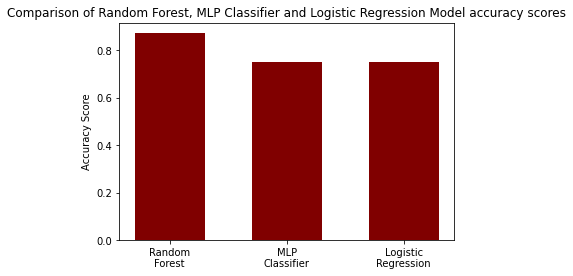

In [19]:
data = {'Random\nForest':RFCTest,  'MLP\nClassifier':MLPTest,'Logistic\nRegression':LRTest}
plt.bar(list(data.keys()),list(data.values()),color='maroon', width=0.6)

plt.ylabel("Accuracy Score")
plt.title("Comparison of Random Forest, MLP Classifier and Logistic Regression Model accuracy scores")
plt.show()

## **Confusion Matrices & Classification Report**

In [20]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

### **Random Forest**

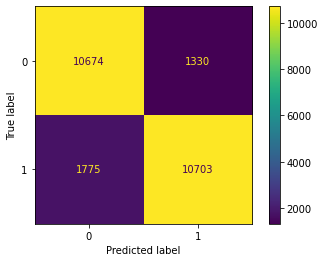

In [21]:
RFCPredictions = modelRFC.predict(x_test)
cmRFC = confusion_matrix(y_test,RFCPredictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cmRFC)
disp.plot()

In [22]:
print(classification_report(y_test,RFCPredictions))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87     12004
           1       0.89      0.86      0.87     12478

    accuracy                           0.87     24482
   macro avg       0.87      0.87      0.87     24482
weighted avg       0.87      0.87      0.87     24482



### **MLP Classifier**

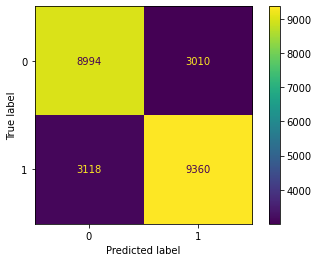

In [23]:
MLPPredictions = modelMLP.predict(x_test)
cmMLP = confusion_matrix(y_test,MLPPredictions)
dispMLP = ConfusionMatrixDisplay(confusion_matrix=cmMLP)
dispMLP.plot()

In [24]:
print(classification_report(y_test,MLPPredictions))

              precision    recall  f1-score   support

           0       0.74      0.75      0.75     12004
           1       0.76      0.75      0.75     12478

    accuracy                           0.75     24482
   macro avg       0.75      0.75      0.75     24482
weighted avg       0.75      0.75      0.75     24482



### **Logistic Regression**

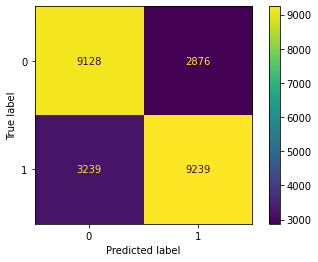

In [25]:
LRPredictions = modelLR.predict(x_test)
cmLR = confusion_matrix(y_test,LRPredictions)
dispLR = ConfusionMatrixDisplay(confusion_matrix=cmLR)
dispLR.plot()

In [26]:
print(classification_report(y_test,LRPredictions))

              precision    recall  f1-score   support

           0       0.74      0.76      0.75     12004
           1       0.76      0.74      0.75     12478

    accuracy                           0.75     24482
   macro avg       0.75      0.75      0.75     24482
weighted avg       0.75      0.75      0.75     24482

